In [7]:
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdt
import numpy as np

%matplotlib inline

pd.__version__, matplotlib.__version__, np.__version__

('0.25.3', '3.1.1', '1.17.4')

In [33]:
%%time

bit = pd.read_csv('coinbase.csv')
bit['date'] = pd.to_datetime(bit.Timestamp, unit='s')

Wall time: 1.52 s


In [34]:
bit.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01 05:33:00
1,1417412040,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01 05:34:00
2,1417412100,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01 05:35:00
3,1417412160,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01 05:36:00
4,1417412220,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-12-01 05:37:00


In [35]:
daily = (bit
    .set_index('date')
    .resample('d')
    .agg({'Close': 'last', 'Open': 'first', 'High': 'max', 'Low': 'min'}))

x = daily.index
y = daily.Close

In [38]:
type(x)

pandas.core.indexes.datetimes.DatetimeIndex

In [39]:
type(y)

pandas.core.series.Series

C:\Users\pestyl\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


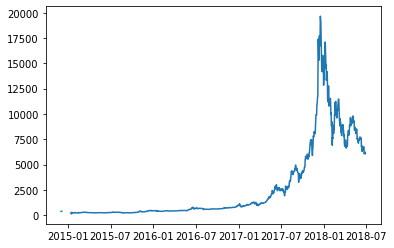

In [37]:
plt.plot(x,y)

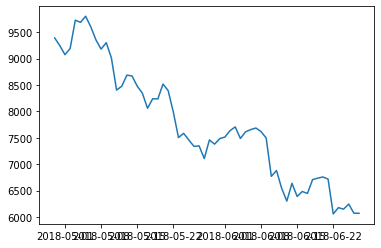

In [40]:
# last 60 days
days = 60
days = 60
x_days = x[-days:]
y_days = y.iloc[-days:]
plt.plot(x_days, y_days)

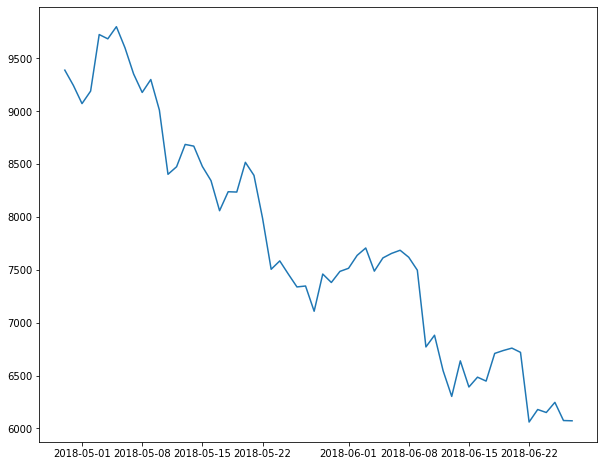

In [42]:
# Increase size
# last 60 days
fig, ax = plt.subplots(figsize=(10,8)) #inches here
days = 60
x_days = x[-days:]
y_days = y.iloc[-days:]
ax.plot(x_days, y_days)

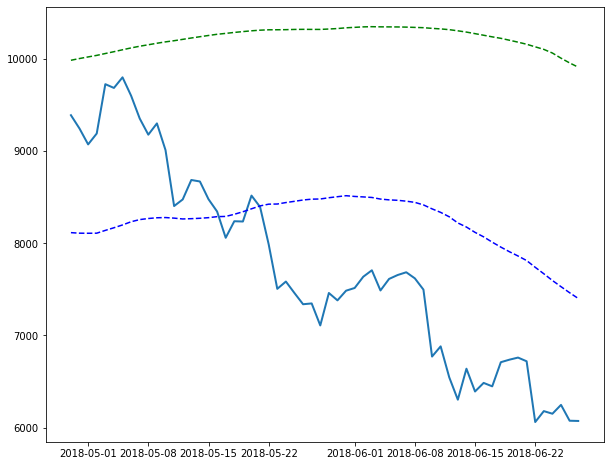

In [43]:
 # Add 50, 200 day MA
# Increase size
# last 60 days
fig, ax = plt.subplots(figsize=(10,8))
days = 60
x_days = x[-days:]
y_days = y.iloc[-days:]
y_days_ma50 = y.rolling(50).mean().iloc[-days:]
y_days_ma200 = y.rolling(200).mean().iloc[-days:]

ax.plot(x_days, y_days, linewidth=2)
ax.plot(x_days, y_days_ma50, color='b', linestyle='--')
ax.plot(x_days, y_days_ma200, color='g', linestyle='--')

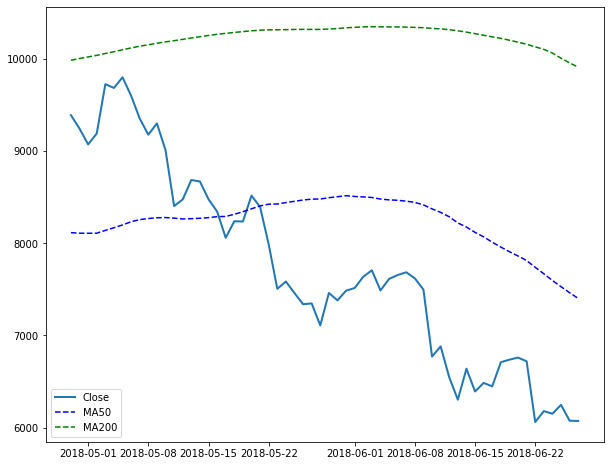

In [44]:
# Add legend
# Add 50, 200 day MA
# Increase size
# last 60 days
fig, ax = plt.subplots(figsize=(10,8))
days = 60
x_days = x[-days:]
y_days = y.iloc[-days:]
y_days_ma50 = y.rolling(50).mean().iloc[-days:]
y_days_ma200 = y.rolling(200).mean().iloc[-days:]

ax.plot(x_days, y_days, linewidth=2, label="Close")
ax.plot(x_days, y_days_ma50, color='b', linestyle='--', label="MA50")
ax.plot(x_days, y_days_ma200, color='g', linestyle='--', label="MA200")
ax.legend()

Text(736819.0, 9800.0, 'Max 9800.0')

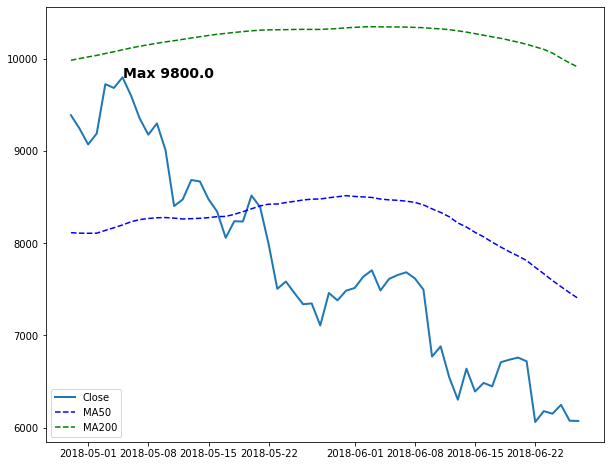

In [45]:
# Annotate High
# Add legend
# Add 50, 200 day MA
# Increase size
# last 60 days
fig, ax = plt.subplots(figsize=(10,8))
days = 60
x_days = x[-days:]
y_days = y.iloc[-days:]
y_days_ma50 = y.rolling(50).mean().iloc[-days:]
y_days_ma200 = y.rolling(200).mean().iloc[-days:]

ax.plot(x_days, y_days, linewidth=2, label="Close")
ax.plot(x_days, y_days_ma50, color='b', linestyle='--', label="MA50")
ax.plot(x_days, y_days_ma200, color='g', linestyle='--', label="MA200")
ax.legend()

max_val = max(y_days)
max_idx = y_days.idxmax()
ax.annotate(f'Max {max_val}', xy=(mdt.date2num(max_idx), max_val),
           weight='bold', size=14)

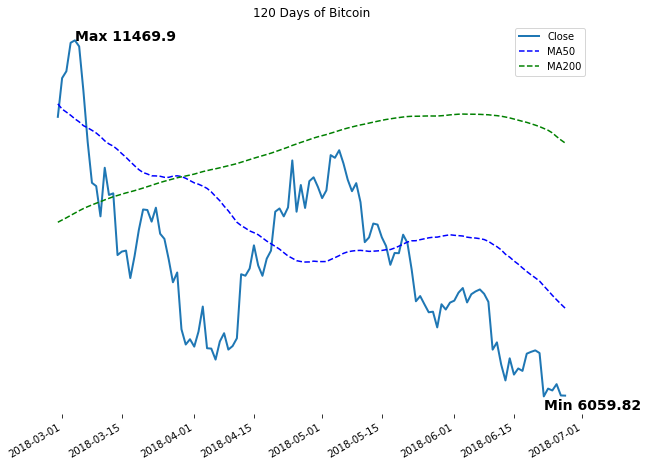

In [47]:
# Add title
# Annotate High
# Add legend
# Add 50, 200 day MA
# Increase size
# last 60 days
fig, ax = plt.subplots(figsize=(10,8))
days = 120
x_days = x[-days:]
y_days = y.iloc[-days:]
y_days_ma50 = y.rolling(50).mean().iloc[-days:]
y_days_ma200 = y.rolling(200).mean().iloc[-days:]

ax.plot(x_days, y_days, linewidth=2, label="Close")
ax.plot(x_days, y_days_ma50, color='b', linestyle='--', label="MA50")
ax.plot(x_days, y_days_ma200, color='g', linestyle='--', label="MA200")
ax.legend()

max_val = max(y_days)
max_idx = y_days.idxmax()
ax.annotate(f'Max {max_val}', xy=(mdt.date2num(max_idx), max_val),
           weight='bold', size=14)

min_val = min(y_days)
min_idx = y_days.idxmin()
ax.annotate(f'Min {min_val}', xy=(mdt.date2num(min_idx), min_val - 200),
           weight='bold', size=14)

#plt.axis('off')  # everything
ax.get_yaxis().set_visible(False)
for side in ['left', 'top', 'right', 'bottom']:
    ax.spines[side].set_visible(False)
ax.set_title(f'{days} Days of Bitcoin')
fig.autofmt_xdate()

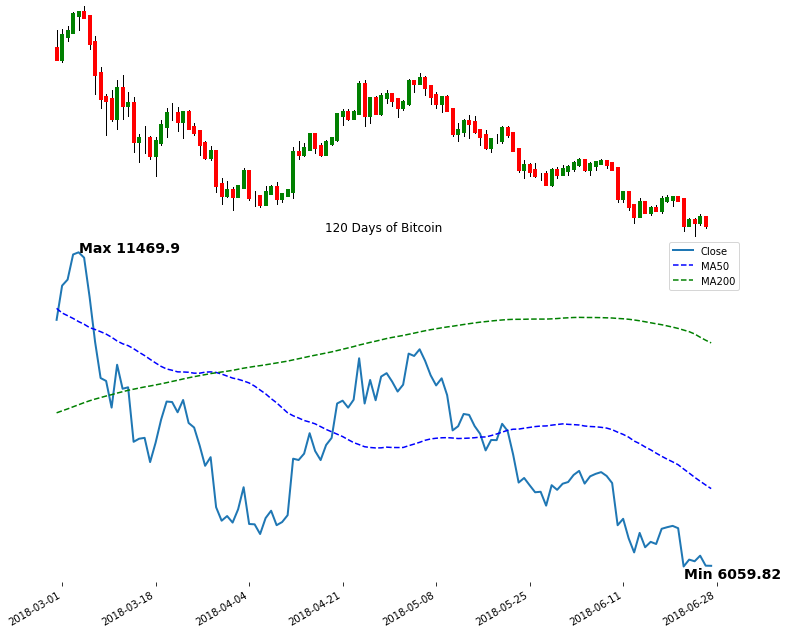

In [48]:
# Add candlesticks
# Add title
# Annotate High
# Add legend
# Add 50, 200 day MA
# Increase size
# last 60 days
# 
fig = plt.figure(figsize=(10,8))
# [left, bottom, width, height] quantities.

ax = fig.add_axes((0,0,1,.6))
days = 120
x_days = x[-days:]
y_days = y.iloc[-days:]
y_days_ma50 = y.rolling(50).mean().iloc[-days:]
y_days_ma200 = y.rolling(200).mean().iloc[-days:]

ax.plot(x_days, y_days, linewidth=2, label="Close")
ax.plot(x_days, y_days_ma50, color='b', linestyle='--', label="MA50")
ax.plot(x_days, y_days_ma200, color='g', linestyle='--', label="MA200")
ax.legend()

max_val = max(y_days)
max_idx = y_days.idxmax()
ax.annotate(f'Max {max_val}', xy=(mdt.date2num(max_idx), max_val),
           weight='bold', size=14)

min_val = min(y_days)
min_idx = y_days.idxmin()
ax.annotate(f'Min {min_val}', xy=(mdt.date2num(min_idx), min_val - 200),
           weight='bold', size=14)

#plt.axis('off')  # everything
ax.get_yaxis().set_visible(False)
for side in ['left', 'top', 'right', 'bottom']:
    ax.spines[side].set_visible(False)
ax.set_title(f'{days} Days of Bitcoin')
xticks = ax.get_xticks()
ax.set_xticks(range(int(xticks[0]), int(xticks[-1]), 
                    int((xticks[-1]-xticks[0])/7)))
fig.autofmt_xdate()

cdata = daily.iloc[-days:]
ax2 = fig.add_axes((0,.6,1,.4))
ax2.plot([cdata.index[0],cdata.index[0]], [3,4])
min2 = None
max2 = None
for idx, row in cdata.iterrows():
    ax2.plot([idx, idx],[row.High, row.Low], c='k', linewidth=1)
    open_ = row.Open
    close = row.Close
    if open_ < close:
        color = 'g'
        lo = open_
        hi = close
    else:
        color = 'r'
        lo = close
        hi = open_
    if min2 is None or min2 > row.Low:
        min2 = row.Low
    if max2 is None or max2 < row.High:
        max2 = row.High
    ax2.plot([idx, idx],[lo, hi], c=color, linewidth=4)
ax2.set_ylim([min2, max2])
_ = ax2.axis('off')

In [50]:
# save
fig.savefig('plot.png', dpi=300)